In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [ ]:
from IPython.display import display, Math, Latex
from __future__ import print_function
from __future__ import division

# Non-Linear Signal Processing: Exercise 3

This exercise is based on C.M.~Bishop: {\it Machine Learning and
Pattern Recognition}, sections 3.1, 4.1.

Your task is to use the cells below to illustrate and discuss the
linear model for prediction and Fisher's linear
discriminant for classification.

Print and comment on the figures produced by the cells as outlined below at the three checkpoints.

## Linear Models
Let  $y(\mathbf x)$ be a function of the vector \mathbf x, where
$\mathbf x=(x_1,\ldots,x_d)^\top$. To estimate $y(\mathbf x)$  we have a
dataset, $\cal D = \left\{ (\mathbf x_n,t_n) \right\}$, $
n=1,\ldots,N$ of $N$ corresponding values of $\mathbf x$ and noisy observations of $y(\mathbf x)$.

Let us model the function $y(\mathbf x)$ with the linear expression
\begin{equation}
  y(\mathbf x) = w_0 + \sum_{i=1}^d w_i x_i \;\; = \;\; w_0 + \mathbf w^\top \mathbf x, \qquad (1)
\end{equation}
where $\bf w$ is a weight vector.
The constant term in equation above can be included in the
weight vector, $\mathbf w$, where another term is also added to $\mathbf x$, such that
$\mathbf x=(1,x_1,\ldots,x_d)^\top$. This reduces the equation to
\begin{equation}
  y(\mathbf x) = \sum_{i=0}^d w_i x_i \;\; = \;\; \mathbf w^\top \mathbf x. \qquad (2)
\end{equation}

The weight-vector, $\mathbf w$, that models the given data-set (training-set)
best is found through minimizing an error function. Here we shall use the
sum-of-squares error function given by
\begin{eqnarray}
  E(\mathbf w) &=& \frac{1}{2} \sum_{n=1}^N \left\{ y(\mathbf x_n;\mathbf w)-t_n 
  \right\}^2\qquad (3)\\
       &=&  \frac{1}{2} \sum_{n=1}^N \left\{ \mathbf w^\top\mathbf x_n -t_n  \right\}^2. \qquad (4)
\end{eqnarray}

Introducing the matrix, $\mathbf X$, where $\mathbf X^\top=(\mathbf x_1\; \mathbf x_2\; \ldots
\mathbf x_N)$ and the vector, $\mathbf t= (t_1, t_2,\ldots, t_N)^\top$,
$E(\mathbf w)$ can be rewritten as
\begin{equation}
  E(\mathbf w) = \frac{1}{2} \left( \mathbf w^\top \mathbf X^\top \mathbf X \mathbf w + \mathbf t^\top \mathbf t-
  2\mathbf w^\top \mathbf X^\top \mathbf t \right). \qquad (5)
\end{equation}
Since $E(\mathbf w)$ is quadratic in $\mathbf w$, the exact value
of $\mathbf w$ minimizing $E(\mathbf w)$ can be found analytically by equating its
derivative to zero. This gives the
normal equations for the least-squares problem:
\begin{equation}
  \mathbf X^\top \mathbf X \mathbf w = \mathbf X^\top \mathbf t \qquad (6)
\end{equation}
Solving for $\mathbf w$ gives the optimal $\mathbf w$.
Since $\mathbf X$ is an $N \times (d+1)$ matrix, $\mathbf X^\top \mathbf X$ is a $(d+1) \times
(d+1)$ square matrix. Thus the solution is
given by
\begin{equation}
  \mathbf w = (\mathbf X^\top \mathbf X)^{-1} \mathbf X^\top \mathbf t\;\; \equiv \;\; \mathbf X^\dagger \mathbf t \qquad (7)
\end{equation}
where $\mathbf X^\dagger$ is a $(d+1) \times N$ matrix known as the *pseudo-inverse* of $\mathbf X$. $\mathbf X^\dagger$ has the property that $\mathbf X^\dagger \mathbf X =
  \mathbf I$, whereas $\mathbf X\mathbf X^\dagger \neq \mathbf I$ in general.

## Checkpoint 3.1
Use the following cells to create a training-set with a
2-dimensional input variable and a 1-dimensional output variable.
Compare the estimated weight vector with the true one and the
dependence on both the noise level and number of points in the
training-set. Note, the software rounds $N$ to be a square number,
due to the lattice presentation.

In [56]:
import numpy as np
import matplotlib.pylab as plt
import mpl_toolkits.mplot3d.axes3d as p3
%matplotlib notebook
plt.rcParams['figure.figsize'] = (12,8)

In [37]:
w_t = np.array([7,3,5])
noise_level = 1
N = 100
d = w_t.shape[0]-1
n = int(np.round(N**(1/d)))
N = n**d

In [38]:
x0 = np.linspace(-1,1,n)
X = np.c_[np.ones(N,),np.array(np.meshgrid(*[x0]*d,indexing='ij')).reshape(d,-1).T[:,::-1]]

T = np.dot(X,w_t)
noise = np.random.randn(N,)*noise_level
T += noise

w = np.dot(np.linalg.pinv(X),T)

Y = np.dot(X,w)
err = ((Y-T)**2).mean()

In [39]:
w

array([ 7.08363219,  2.90966633,  5.30793017])

In [40]:
err

0.94599320314092938

<IPython.core.display.Javascript object>


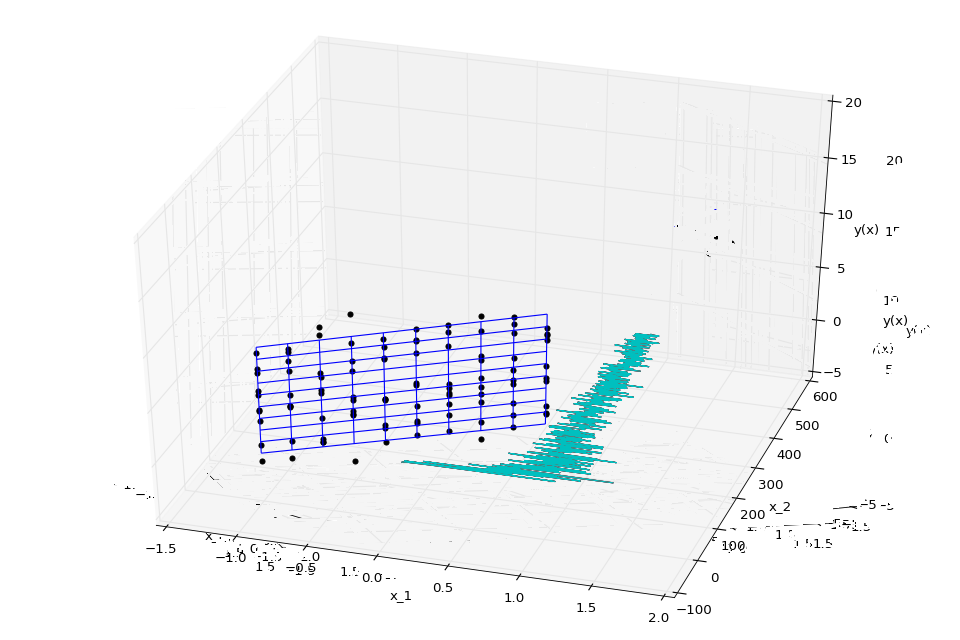

In [6]:
fig=plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(X[:,1], X[:,2], T,c='k',depthshade=False)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y(x)')
ax.plot_wireframe(X[:,1].reshape(n,n), X[:,2].reshape(n,n), Y.reshape(n,n))
fig.add_axes(ax);

In [42]:
error = []
for x in range(1,500):
    w_t = np.array([7,3,5])
    noise_level = 1
    N = x
    d = w_t.shape[0]-1
    n = int(np.round(N**(1/d)))
    N = n**d
    x0 = np.linspace(-1,1,n)
    X = np.c_[np.ones(N,),np.array(np.meshgrid(*[x0]*d,indexing='ij')).reshape(d,-1).T[:,::-1]]

    T = np.dot(X,w_t)
    noise = np.random.randn(N,)*noise_level
    T += noise

    w = np.dot(np.linalg.pinv(X),T)

    Y = np.dot(X,w)
    err = ((Y-T)**2).mean()
    error.append(err)


<IPython.core.display.Javascript object>


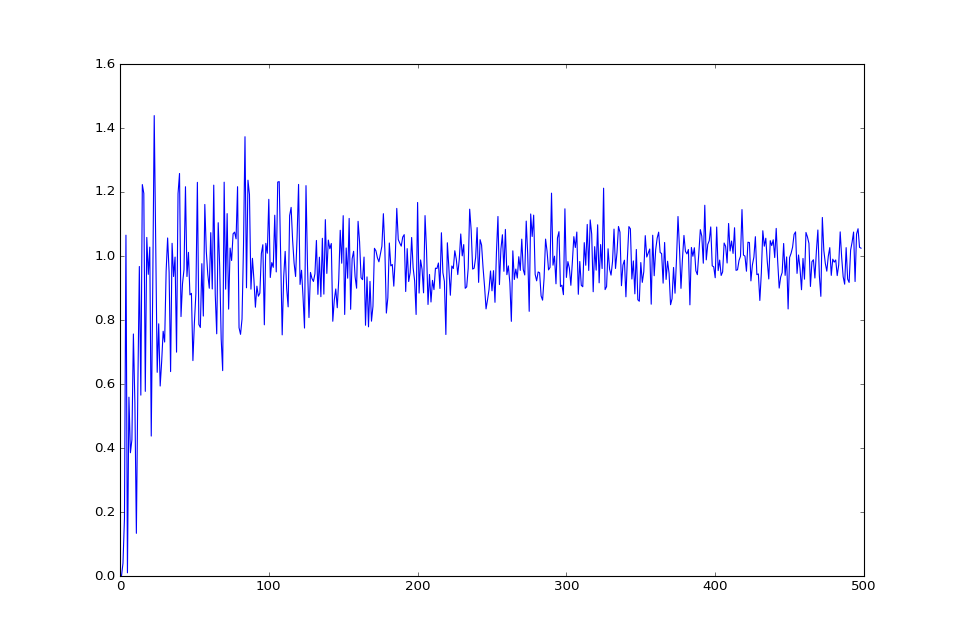

In [57]:
plt.plot(error)

## Time Series Prediction
An example where the linear model can be used is in time series
prediction. To illustrate this, consider the example of the sunspot
measurements. The number of sunspots oscillates almost periodically
over a period of some years. The average number of sunspots has been
measured yearly since 1700. Imagine we want to predict the average
number of sunspots next year. The linear model can be used for this.

Let the number of sunspots in year $n$ be $x_n$.  Let's assume that
the number of sunspots in year $n$ only depends on the number of
sunspots in the previous $d$ years. This is reasonable since there
must be a limit as to how far back one can expect a correlation. This
can be expressed as
\begin{equation}
  x_n = f(x_{n-1}, x_{n-2}, \ldots x_{n-d}).
\end{equation}
Approximating the function $f$ with a linear model gives
\begin{equation}
  x_n = w_0 + \sum_{j=1}^d w_j x_{n-j}.
\end{equation}
This corresponds to equation 1, and hence is the same
problem given by equations 2 to 7, where
the training set is given by
\begin{equation}
  \left.
  \begin{array}{ccl}
    \mathbf x_n &=& (1, x_{n-d}, \ldots , x_{n-1})^\top\\
    t_n &=& x_n
  \end{array} \right\} \;\; n = 1,\ldots,N-d-1.
\end{equation}
Note the important difference in the notations $\mathbf x_n$ and $x_n$.
The weights can be found using equation 7, and the
predicted value, $x_{n+1}$, can be found from
\begin{equation}
  x_{n+1} = y(\mathbf x_n) = \mathbf w^\top\mathbf x_n.
\end{equation}

## Checkpoint 3.2:
Use the cells below to perform a time series prediction of
the number of sunspots. Compare the actual measurements with the
predicted values as a function of the number of weights, $d$, (hence
years) included in the model. Explain the value of the error for very large $d$.

In [209]:
d = 150
S = np.fromfile('sp.dat',sep='\t')
year, S = S.reshape(-1,2).T

In [264]:
def d2err(d):
    N = S.shape[0]-d
    T = S[d:]
    X = np.array([S[i:N+i] for i in range(d)]).T
    X = np.c_[np.ones(N,),X]
    w = np.dot(np.linalg.pinv(X),T)
    Y = np.dot(X,w)
    err = ((Y-T)**2).mean()
    return err, N, T, X, w, Y

In [265]:
err, N, T, X, w, Y = d2err(d)
w

array([ 0.08318613,  0.33659142,  0.036348  ,  0.27611211, -0.04880353,
        0.22547899,  0.16875821, -0.09272644,  0.20352507, -0.01012764,
       -0.28311201, -0.22800815, -0.07027119, -0.10898471, -0.31568478,
       -0.50967175, -0.3371183 , -0.1902861 , -0.21636929,  0.0741661 ,
       -0.19417168,  0.11219721, -0.12678273,  0.21110829,  0.19379333,
        0.21025524, -0.260615  ,  0.13131434, -0.15823142,  0.11945521,
        0.12333213,  0.48789174, -0.02278779,  0.10224218, -0.67581704,
        0.32639884, -0.58092792,  0.18749951, -0.20948155, -0.04517761,
        0.09722094, -0.159549  ,  0.21031473, -0.01665571,  0.06594113,
       -0.17572292,  0.08627559, -0.12400234, -0.36023821,  0.05164572,
       -0.00263379,  0.03264759, -0.18806258, -0.07575098, -0.44684221,
       -0.18586905,  0.17427401, -0.16522993,  0.12278363, -0.10632337,
       -0.19421495,  0.00192534, -0.0451955 ,  0.12982013, -0.0285783 ,
        0.37389827,  0.05270359,  0.02194838,  0.09054737,  0.09

In [245]:
err

2.1537237281290428e-29

<IPython.core.display.Javascript object>


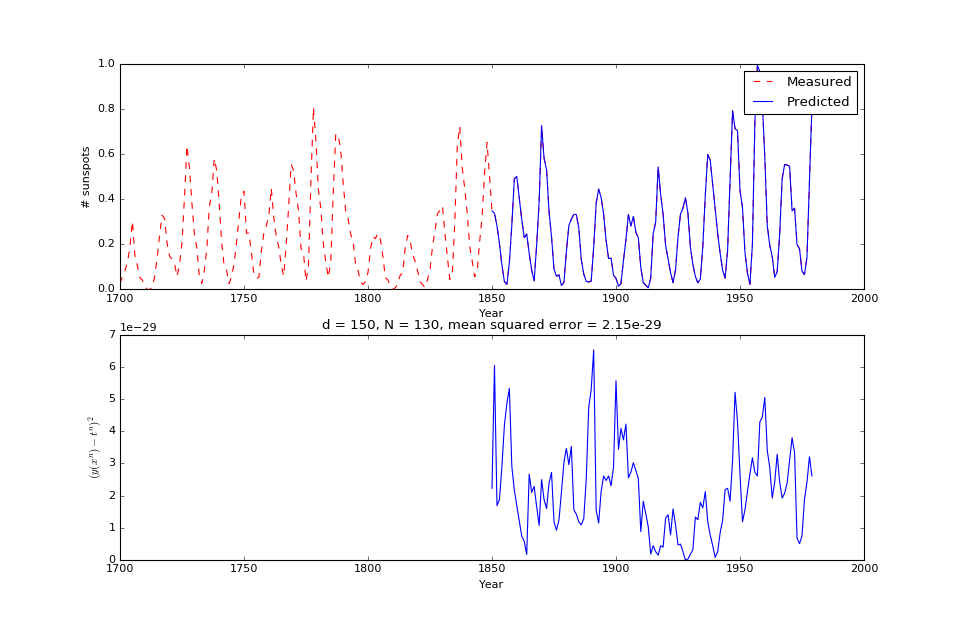

In [262]:
plt.subplot(211)
plt.plot(year,S,'r--',year[d:],Y)
plt.xlabel('Year')
plt.ylabel('# sunspots')
plt.legend(['Measured', 'Predicted'])
plt.subplot(212)
plt.plot(year[d:],(Y-T)**2)
plt.xlim(1700,2000)
plt.xlabel('Year')
plt.ylabel('$(y(x^n)-t^n)^2$')
plt.title('d = %d, N = %d, mean squared error = %.2e' %(d,N,err));

## Fisher's Linear Discriminant

In exercise 2, we saw that a multidimensional variable can be
projected onto the directions of largest covariance by a coordinate
transformation to the coordinate system spanned by the eigenvectors of
the covariance matrix. This may facilitate classification of the
data. However, there are also some cases, where the direction that
maximizes class separation doesn't correspond to any of the
eigenvectors. In such a case, the coordinate transformation does not
solve the problem. However, the direction of maximum class separation
can be found using Fisher's linear discriminant.

Consider a two-class problem in which there are $N_1$ points of class
$C_1$ and $N_2$ points of class $C_2$. The mean vectors of the two
classes are given by
\begin{eqnarray}
  \mathbf m_1 &=& \frac{1}{N_1} \sum_{n\in C_1} \mathbf x_n\\
  \mathbf m_2 &=& \frac{1}{N_2} \sum_{n\in C_2} \mathbf x_n.
\end{eqnarray}
Let the projection of a data vector, \mathbf x, onto a the direction of
maximum class separation be
\begin{equation}
  y=\mathbf w^\top\mathbf x.
\end{equation}
This is the direction along which the probability density
functions of the two classes, $p(y|C_1)$ and $p(y|C_2)$, overlap
the least. It can be shown by maximizing Fisher's criterion  that
the direction vector for the projection, \w, is given by
\begin{equation}
  \mathbf w \propto \Sigma_w^{-1}(\mathbf m_2 -\mathbf m_1),
\end{equation}
where $\Sigma_w$ is the total within-class variation matrix, given by
\begin{equation}
  \Sigma_w = \sum_{n\in C_1} (\mathbf x_n-\mathbf m_1)(\mathbf x_n -\mathbf m_1)^\top +
         \sum_{n\in C_2} (\mathbf x_n-\mathbf m_2)(\mathbf x_n -\mathbf m_2)^\top.
\end{equation}

### Checkpoint 3.3
Use the cells below to find the direction maximizing class
separation for a two-class problem. In the figure class $C_1$ is color coded as blue and class $C_2$ as red. Compare the projection of the
data-set onto one-dimension with the projections found using
eigenvector transformation as illustrated in exercise 2. Compose
different data-sets and compare the performance of the two methods in
each case.

In [63]:
mu1=np.array([5, 4]) # true mean value
mu2=np.array([4, -1]) #true mean value

Sigma=np.array([2,  -1.7,  -1.7, 3]).reshape(2,2)   # true covariance matrix

p1 = 0.3          # P(C1)  probabilty of class 1
p2 = 1-p1

N=4000            # number of points in density

In [64]:
D1 = np.random.multivariate_normal(mu1, Sigma, N)
D1 = D1.T

D2 = np.random.multivariate_normal(mu2, Sigma, N)
D2 = D2.T

c1 = np.random.binomial(n = 1, p = p1,size = N)
c2 = 1 - c1
X = D1*c1+D2*c2

T = c1 - c2

N1 = c1.sum()
N2 = c2.sum()

m1 = (X*c1).sum(axis=1)/N1
m2 = (X*c2).sum(axis=1)/N2

SW1 = (X-m1[:,None])*c1
SW1 = np.dot(SW1,SW1.T)
SW2 = (X-m2[:,None])*c2
SW2 = np.dot(SW2,SW2.T)
SW = SW1 + SW2

w = np.dot(np.linalg.inv(SW),m2-m1)
w /= np.linalg.norm(w)

Y = np.dot(w.T,X)

In [65]:
mu_ = X.mean(1)
Sigma_ = np.cov(X)
lamda, U = np.linalg.eig(Sigma_)
X_ = np.dot(U.T,X-mu_[:,None])

In [66]:
nbins = 50
z1,x1= np.histogram(X[0,:],nbins)
z2,x2= np.histogram(X[1,:],nbins)
z3,x3= np.histogram(Y,nbins)
z1 = z1/z1.sum()
z2 = z2/z2.sum()
z3 = z3/z3.sum()
x1 = np.convolve(x1, np.ones(2,)/2, 'valid')
x2 = np.convolve(x2, np.ones(2,)/2, 'valid')
x3 = np.convolve(x3, np.ones(2,)/2, 'valid')
bar_width = np.diff(x1)[0]
bar_width2 = np.diff(x2)[0]
bar_width3 = np.diff(x3)[0]

In [67]:
w

array([-0.70746971, -0.70674366])

In [68]:
U,lamda,N

(array([[-0.99505902,  0.09928513],
        [-0.09928513, -0.99505902]]), array([ 2.05991296,  8.42645211]), 4000)

<IPython.core.display.Javascript object>


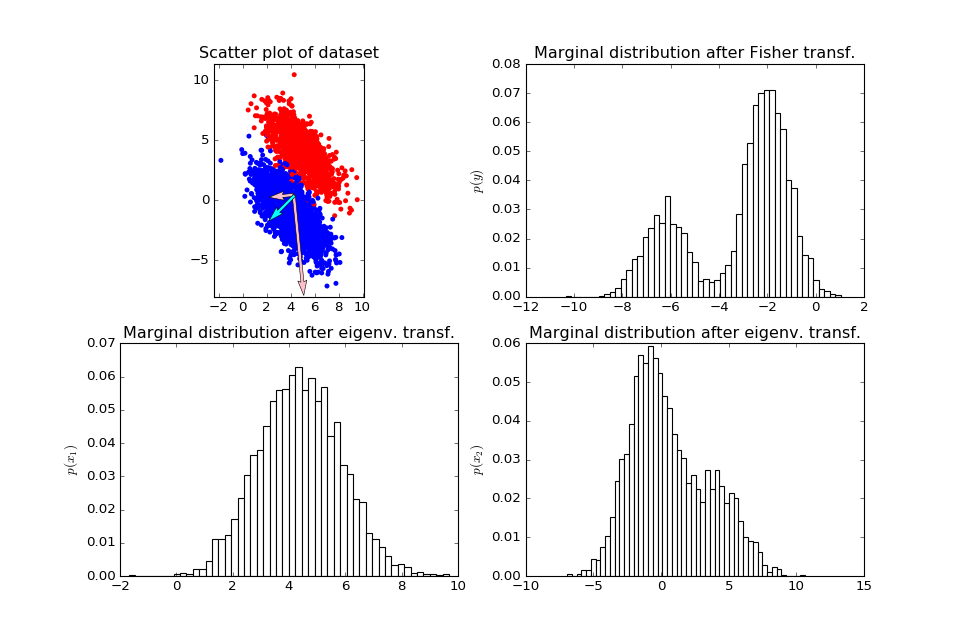

In [69]:
fig = plt.figure()

ax = fig.add_subplot(221)
plt.scatter(*X,linewidths=0,alpha=1,c=["r" if c else "b" for c in c1])
#plt.legend(["$C_1$","$C_2$"])
plt.axis('image')
plt.title('Scatter plot of dataset')
scaled_eigenvectors_ = np.c_[np.c_[mu_,mu_].T,np.c_[U[:,0]*lamda[0],U[:,1]*lamda[1]].T]
XX,YY,UU,VV = zip(*scaled_eigenvectors_)
ax.quiver(XX,YY,UU,VV,color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);
ax.quiver(XX[0],YY[0],*w*3,color='cyan',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);

fig.add_subplot(222)
plt.bar(x3,z3,bar_width,color='white')
plt.title('Marginal distribution after Fisher transf.')
plt.ylabel("$p(y)$")

fig.add_subplot(223)
plt.bar(x1,z1,bar_width,color='white')
plt.title('Marginal distribution after eigenv. transf.')
plt.ylabel("$p(x_1)$")

ax = fig.add_subplot(224)
plt.bar(x2,z2,bar_width2,color='white')
plt.title('Marginal distribution after eigenv. transf.')
plt.ylabel("$p(x_2)$");

## Challenge (not part of the curriculum):
Modify the cells corresponding to checkpoint 3.2 to predict the number of sunspots two
or more years ahead. Compare and discuss the predictions of the one vs. two step ahead prediction for different model dimensions ($d$)